In [10]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [16]:
ls

'Colab Notebooks'/         IMG_20190916_142009.jpg   niz.jpg
 fer2013.csv               IMG_20190916_142150.jpg  'Sample Logos.gslides'
'Getting started.pdf'      IMG_20190916_150540.jpg   Untitled0.ipynb
 IMG_20190916_141655.jpg   IMG_20190916_151228.jpg   yolo-object-detection/
 IMG_20190916_141711.jpg   IMG_20190916_151232.jpg


In [0]:
import tensorflow as tf
import h5py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import os

In [19]:
sess = tf.Session() 
#variables
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 5

with open("/content/drive/My Drive/fer2013.csv") as f:
    content = f.readlines()
 
lines = np.array(content)
 
num_of_instances = lines.size
print("number of instances: ",num_of_instances)

number of instances:  1749


In [38]:
lines[5].split(",")[2]

'Training\n'

In [0]:
x_train, y_train, x_test, y_test = [], [], [], []
 
for i in range(1,num_of_instances):
 try:
    emotion, img, usage = lines[i].split(",")
  
    val = img.split(" ")
    pixels = np.array(val, 'float32')
  
    emotion = tf.keras.utils.to_categorical(emotion, num_classes)
  
    if 'Training' in usage:
        y_train.append(emotion)
        x_train.append(pixels)
    elif 'PublicTest' in usage:
        y_test.append(emotion)
        x_test.append(pixels)
 except:
    pass

In [42]:

 #except:
 # print("", end="")


#------------------------------
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

1747 train samples
0 test samples


In [0]:
model = Sequential()
 
#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

In [44]:
#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
model.add(Flatten())
 
#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
 
model.add(Dense(num_classes, activation='softmax'))


# In[17]:


gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)
 
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_2 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)        

In [0]:
checkpoint_path = "/content/drive/My Drive/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [46]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

model.save_weights(checkpoint_path)

model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs, callbacks=[cp_callback])

model.save('my_model.h5')

Epoch 1/5
255/256 [============================>.] - ETA: 0s - loss: 1.8138 - acc: 0.2388
Epoch 00001: saving model to /content/drive/My Drive/cp.ckpt
256/256 [==============================] - 16s 62ms/step - loss: 1.8138 - acc: 0.2389
Epoch 2/5
255/256 [============================>.] - ETA: 0s - loss: 1.8099 - acc: 0.2392
Epoch 00002: saving model to /content/drive/My Drive/cp.ckpt
256/256 [==============================] - 15s 58ms/step - loss: 1.8099 - acc: 0.2391
Epoch 3/5
255/256 [============================>.] - ETA: 0s - loss: 1.8096 - acc: 0.2393
Epoch 00003: saving model to /content/drive/My Drive/cp.ckpt
256/256 [==============================] - 15s 58ms/step - loss: 1.8096 - acc: 0.2393
Epoch 4/5
255/256 [============================>.] - ETA: 0s - loss: 1.8093 - acc: 0.2393
Epoch 00004: saving model to /content/drive/My Drive/cp.ckpt
256/256 [==============================] - 15s 58ms/step - loss: 1.8092 - acc: 0.2392
Epoch 5/5
255/256 [============================>.] -

In [48]:
# In[ ]:
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])


Train loss: 1.8082750770932412
Train accuracy: 23.926731944084167


In [49]:
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

ValueError: ignored

In [0]:
# In[18]:


def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


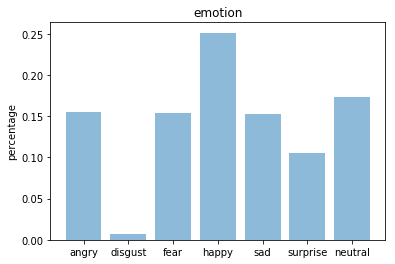

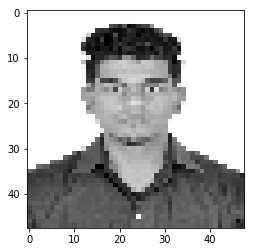

In [52]:

img = tf.keras.preprocessing.image.load_img("/content/drive/My Drive/niz.jpg", grayscale=True, target_size=(48, 48))
 
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
 
x /= 255
 
custom = model.predict(x)
emotion_analysis(custom[0])
 
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
 
plt.gray()
plt.imshow(x)
plt.show()

